In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
import tensorflow.keras as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model



In [2]:
filepath ='WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
df = pd.read_csv(filepath)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#check Churn for even results
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
#Data Exploration
#I basically am just gonna make a bunch of plts to see if theres any visible trends between columns and churn
for col in df.columns:
    if col != 'Churn':
        plt.figure(figsize=(6, 4))
        sns.histplot(data=df, x=col, hue='Churn', multiple='stack', kde=False)
        plt.title(f'{col} vs Churn')
        plt.tight_layout()
        plt.show()

Little/No difference:
Customer ID, 

In [5]:
df = df.drop(['customerID'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
#Convert columns into values so they can be compat with our neural networks
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])

df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['TotalCharges'] = le.fit_transform(df['TotalCharges'])


df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,6104,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1550,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,2609,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,2646,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3022,0


In [8]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.shape

(7043, 20)

In [10]:
#Cleaning data, start checking for info
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
#Split Data into X and Y
y = df['Churn']
x= df.drop(['Churn'], axis=1)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [13]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03
mean,-2.219500e-17,-4.842546e-17,7.162933e-17,1.069396e-16,-2.421273e-17,7.869137e-17,-1.513296e-17,8.575342e-18,6.809830e-17,2.295165e-17,-4.539887e-17,-3.127478e-17,2.169057e-17,7.062046e-18,-7.566478e-17,-5.952296e-17,-1.160193e-17,-6.406285e-17,2.623046e-17
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.009559e+00,-4.399165e-01,-9.666223e-01,-6.540119e-01,-1.318165e+00,-3.054010e+00,-9.915883e-01,-1.183234e+00,-9.188378e-01,-1.029919e+00,-1.027910e+00,-9.252621e-01,-1.113495e+00,-1.121405e+00,-8.282069e-01,-1.205113e+00,-1.474052e+00,-1.545860e+00,-1.725015e+00
25%,-1.009559e+00,-4.399165e-01,-9.666223e-01,-6.540119e-01,-9.516817e-01,3.274383e-01,-9.915883e-01,-1.183234e+00,-9.188378e-01,-1.029919e+00,-1.027910e+00,-9.252621e-01,-1.113495e+00,-1.121405e+00,-8.282069e-01,-1.205113e+00,-5.377472e-01,-9.725399e-01,-8.730433e-01
50%,9.905318e-01,-4.399165e-01,-9.666223e-01,-6.540119e-01,-1.372744e-01,3.274383e-01,6.272275e-02,1.722502e-01,2.442417e-01,1.063153e-01,1.086002e-01,2.355183e-01,1.652594e-02,8.502786e-03,-8.282069e-01,8.297975e-01,3.985577e-01,1.857327e-01,-4.656524e-03
75%,9.905318e-01,-4.399165e-01,1.034530e+00,1.529024e+00,9.214551e-01,3.274383e-01,1.117034e+00,1.722502e-01,1.407321e+00,1.242550e+00,1.245111e+00,1.396299e+00,1.146547e+00,1.138411e+00,3.712710e-01,8.297975e-01,3.985577e-01,8.338335e-01,8.703490e-01
max,9.905318e-01,2.273159e+00,1.034530e+00,1.529024e+00,1.613701e+00,3.274383e-01,1.117034e+00,1.527734e+00,1.407321e+00,1.242550e+00,1.245111e+00,1.396299e+00,1.146547e+00,1.138411e+00,1.570749e+00,8.297975e-01,1.334863e+00,1.794352e+00,1.732647e+00


In [14]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [15]:
from sklearn.utils import class_weight
#I need this dataset to be weighted, since it is currently very skewed on the negative
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y),
    y=y
)

class_weights = dict(enumerate(class_weights))


In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,train_size=0.8,random_state=0)

In [17]:
df.shape

(7043, 20)

In [18]:
model = Sequential()
model.add(Dense(16, input_dim=19, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(Xtrain, ytrain, batch_size=50, epochs=20, verbose=1, validation_split=0.2)


Epoch 1/20


C:\Users\Gaming\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6735 - loss: 0.5978 - val_accuracy: 0.7524 - val_loss: 0.4673
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7302 - loss: 0.4860 - val_accuracy: 0.7782 - val_loss: 0.4369
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7797 - loss: 0.4419 - val_accuracy: 0.7924 - val_loss: 0.4249
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7860 - loss: 0.4359 - val_accuracy: 0.7977 - val_loss: 0.4178
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7768 - loss: 0.4322 - val_accuracy: 0.7968 - val_loss: 0.4136
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7920 - loss: 0.4248 - val_accuracy: 0.8030 - val_loss: 0.4097
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8018 - loss: 0.4136 - val_accuracy: 0.8021 - val_loss: 0.4097
Epoch 8/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7942 - loss: 0.4116 - val_accuracy: 0.8039 - val_loss: 0.4084
Epo

In [19]:
#Val loss began climbing after epoch 16, so I reduced epochs to 20. 
ypred = model.predict(Xtest)
ypred = ypred.argmax(axis=-1)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [20]:
accuracy_score(ytest,ypred)

0.7388218594748048

<Axes: >

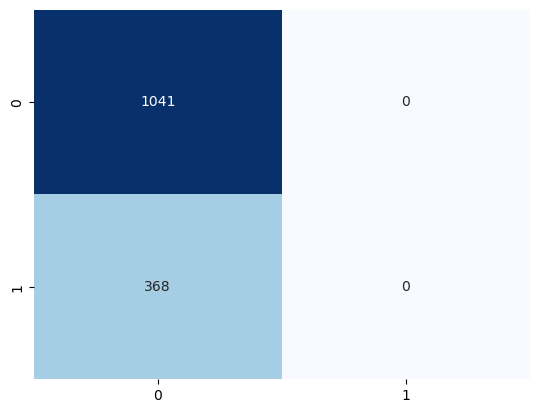

In [21]:
cf_matrix = confusion_matrix(ytest, ypred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#This': Expected package name at the start of dependency specifier
    #This
    ^
